Section 7 
=============
Introduction to Deep Learning with TensorFlow  
----------
Sunday 16 October 11am EDT and Tuesday 18 October 9pm EDT (Q/A session)

---   
- Step 0 -     
=================

Preliminaries - loading libraries and styles
---------------

---

In [140]:
# These are all the modules we'll be using later. Make sure you can import them
# before proceeding further.
from __future__ import print_function
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
import sys
import tarfile
from IPython.display import display, Image
from scipy import ndimage
from sklearn.linear_model import LogisticRegression
from six.moves.urllib.request import urlretrieve
from six.moves import cPickle as pickle
from six.moves import range

# Config the matlotlib backend as plotting inline in IPython
%matplotlib inline

import tensorflow as tf

In [141]:
# special matplotlib command for global plot configuration
from matplotlib import rcParams
import matplotlib.cm as cm
import matplotlib as mpl
from matplotlib.colors import ListedColormap

dark2_colors = [(0.10588235294117647, 0.6196078431372549, 0.4666666666666667),
                (0.9058823529411765, 0.1607843137254902, 0.5411764705882353),
                (0.8509803921568627, 0.37254901960784315, 0.00784313725490196),
                (0.4588235294117647, 0.4392156862745098, 0.7019607843137254),            
                (0.4, 0.6509803921568628, 0.11764705882352941),
                (0.9019607843137255, 0.6705882352941176, 0.00784313725490196),
                (0.6509803921568628, 0.4627450980392157, 0.11372549019607843)]

cmap_set1 = ListedColormap(['#e41a1c', '#377eb8', '#4daf4a'])
dark2_cmap=ListedColormap(dark2_colors)

def set_mpl_params():
    rcParams['figure.figsize'] = (10, 6)
    rcParams['figure.dpi'] = 150
    rcParams['axes.prop_cycle'].by_key()['color'][1]
    rcParams['lines.linewidth'] = 2
    rcParams['axes.facecolor'] = 'white'
    rcParams['font.size'] = 14
    rcParams['patch.edgecolor'] = 'white'
    rcParams['patch.facecolor'] = dark2_colors[0]
    rcParams['font.family'] = 'StixGeneral'

set_mpl_params()

In [265]:
## Markdown CSS
from IPython.core.display import HTML
HTML("""
<style>

div.cell { 
    margin-top:1em;
    margin-bottom:1em;
}

div.text_cell_render h1 {
    font-size: 2.em;
    line-height:1.2em;
    text-align:center;
}

div.text_cell_render h2 {
margin-bottom: -0.2em;
}

table tbody tr td:first-child, 
table tbody tr th:first-child, 
table thead tr th:first-child, 
table tbody tr td:nth-child(4), 
table thead tr th:nth-child(4) {
    background-color: #edf4e8;
}

div.text_cell_render { 
    font-family: 'Garamond';
    font-size:1.5em;
    line-height:1.4em;
    padding-left:3em;
    padding-right:3em;
}
</style>
""")

In [143]:
print(sys.version)

3.5.2 |Continuum Analytics, Inc.| (default, Jul  2 2016, 17:52:12) 
[GCC 4.2.1 Compatible Apple LLVM 4.2 (clang-425.0.28)]


#### Please download and unzip the notMNIST digit dataset from Canvas [at the link here](https://canvas.harvard.edu/files/2946531/download?download_frd=1). It is a 112 MB zipped file which contains a pickled Python dataset named ```notMNIST.pickle```. The file should be placed in the same folder as this Notebook

---   
- Step 1 -     
=================

Introduction - how it works
---------------

---

### A simple Hello World - placeholders, variables and operators   

We start with a simple multiplication, calculating ```y``` directly from two inputs ```a``` and ```b```   

---  
TensorFlow uses symbolic variables, defined by ```tf.placeholder("dtype")``` Typically, these variables will be given values upon running the program, and they will be the inputs to calculations.   A simple examples is multiplication, but there are many other simple operators that TensorFlow implements - basically all of the common operators in Numpy.  Placeholders can be scalars, as below, or tensors of any shape.   

Once we have define the operation with ```tf.mul(a,b)```, we need to tell TensorFlow what we want it to do. So we create a new TensorFlow session with ```tf.Session()```, attributing the session to a reference variable ```session```. With this, we can later reference the session, as we do in the print statement. We invoke the ```run()``` method which tells TensorFlow to start the program that we have made. 

Specifically, in the statement ```session.run(y, feed_dict={a: 3, b: 3})```, we tell TensorFlow to solve the function ```y```, and we specify the ```feed_dict``` which is a Python dict that contains the values for the placeholders. TensorFlow will look for the values of any placeholders in ```feed_dict``` - i.e. all variables in a model that are not given values in the program itself. If you forget to feed the values here, TensorFlow will complain.

In [130]:
a = tf.placeholder("float32")
b = tf.placeholder("float32")
  
y = tf.mul(a, b)
  
session = tf.Session()
  
print (session.run(y, feed_dict={a: 3, b: 3}))

9.0


As expected, TensorFlow solves for ```y``` and prints out the answer.   

You might call the method ```run()``` several times in the course of implementing your TensorFlow program. Anytime you want TensorFlow to yield you the value of model variable (e.g. a loss function, a tensor variable, or whatever is on the left-hand side of an equal sign), you can call ```run()```.    

There is also another TensorFlow class to invoke an interactive session, using ```tf.InteractiveSession()```.   Let's look at the set of simple operations:  

### Simple operations   

| Operator   |  Description | | Operator   |  Description |
|------: |:------| ------: | |:------|
| tf.add	| sum || tf.square	|  square | 
| tf.sub	| substraction || tf.round	| nearest integer | 
| tf.mul	| multiplication || tf.sqrt	| square root | 
| tf.div	| division ||  tf.pow	|  power | 
| tf.mod	| modulo || tf.exp	| exponential |
| tf.abs	| absolute value ||  tf.log	| logarithm | 
| tf.maximum	| maximum || tf.minimum	|  minimum | 
| tf.inv	| the inverse |    |     |

### Matrix operations
| Operator   |  Description |
|------: |:------| 
| tf.diag	| returns a diagonal tensor with a given diagonal values| 
| tf.transpose	| returns the transposes of the argument| 
| tf.matmul	| returns a tensor product of multiplying two tensors listed as arguments| 
| tf.matrix_determinant	| returns the determinant of the square matrix specified as an argument| 
| tf.matrix_inverse	| returns the inverse of the square matrix specified as an argument| 

### Simple Example #1: HW2 Problem 4, the Painful 2D function    

Next, we make ```x``` and ```y``` tensorflow variables and iterate to a solution for the optimization of an objective ```obj```, using the built-in gradient descent optimizer. This is what we will do in general, when we minimize a given loss function. The TensorFlow type ```tf.Variable()``` defines a variable that you want it to estimate: this will usually be your weights and bias terms in a Neural Network, but it can be any tensor in fact. Here it is simply the scalars ```x``` and ```y```. You can initialize it with some value, here ```tf.random_uniform([1], -4.0, 4.0)```, and give it a name. We can then use the two variables thus defined as part of an objective function that we want to solve.  Remember this one:

$ 100 \cdot x \cdot \exp(-0.5 \cdot x^2 + 0.5 \cdot x - 0.5 \cdot y^2 - y + \pi) $

What does [Wolfram Alpha say][1] about the shape of this function?

[1]:https://www.wolframalpha.com/input/?i=100%E2%8B%85x%E2%8B%85exp%E2%81%A1(%E2%88%920.5%E2%8B%85x2%2B0.5%E2%8B%85x%E2%88%920.5%E2%8B%85y2%E2%88%92y%2B%CF%80)

In [253]:
x = tf.Variable(tf.random_uniform([1], -1.0, 1.0),'x')
y = tf.Variable(tf.random_uniform([1], -1.0, 1.0),'y')

obj = tf.mul(100.0,tf.mul(x,tf.exp(tf.add(tf.sub(
                    tf.sub(tf.add(tf.mul(-0.50,tf.square(x)),
                                  tf.mul(0.50,x)),tf.mul(0.50,tf.square(y))),y),np.pi))))

Next we specify the optimizer that we want to use,   

    tf.train.GradientDescentOptimizer(0.00005)  
specifying the step multiplier as a parameter. The objective function is defined by  

    train = optimizer.minimize(obj)  
We could also chain both together in one espression.

In [254]:
optimizer = tf.train.GradientDescentOptimizer(0.00005)
train = optimizer.minimize(obj)

As we have defined variables we need to initialize them. To do this we create another reference variable ```init```, assigning it ```tf.initialize_all_variables()```. Once we create a session using once again ```tf.Session()```, we can run the initialization with ```sess.run(init)```. Anytime we want to reinitialize, we can repeat this.

In [255]:
init = tf.initialize_all_variables()
 
sess = tf.Session()
sess.run(init)

Next, we run a ```for``` loop of 500 iterations. At each step, we ask TensorFlow to perform the optimisation with ```sess.run(train)```, and every tenth step, we print out  

    step, sess.run(x), sess.run(y), sess.run(obj).    
    
Notice that the ```run()``` method is used repeatedly. 

In [256]:
for step in range(300):
    sess.run(train)
    if step % 10 == 0:
        print (step, sess.run(x), sess.run(y), sess.run(obj))

0 [-0.42539263] [-0.06999375] [-777.73730469]
10 [-0.72250837] [-0.45817474] [-1277.53283691]
20 [-0.77316266] [-0.73260128] [-1434.07385254]
30 [-0.77988338] [-0.87450147] [-1474.72473145]
40 [-0.78067493] [-0.94182181] [-1483.87158203]
50 [-0.78076494] [-0.97310346] [-1485.84753418]
60 [-0.78077513] [-0.98757267] [-1486.27001953]
70 [-0.78077626] [-0.99425876] [-1486.36083984]
80 [-0.78077632] [-0.99734771] [-1486.38024902]
90 [-0.78077632] [-0.99877471] [-1486.3840332]
100 [-0.78077632] [-0.99943393] [-1486.38476562]
110 [-0.78077632] [-0.99973851] [-1486.38500977]
120 [-0.78077632] [-0.99987924] [-1486.38500977]
130 [-0.78077632] [-0.99994421] [-1486.38500977]
140 [-0.78077632] [-0.99997425] [-1486.38500977]
150 [-0.78077632] [-0.99998814] [-1486.38500977]
160 [-0.78077632] [-0.99999452] [-1486.38500977]
170 [-0.78077632] [-0.99999744] [-1486.38500977]
180 [-0.78077632] [-0.99999887] [-1486.38500977]
190 [-0.78077632] [-0.99999946] [-1486.38500977]
200 [-0.78077632] [-0.99999964] [

Easy. We didn't even need 500 iterations. Try playing around with the starting points and the step size parameter to see how the results change. To fix a starting value for ```x``` and ```y```, you can use, for example:    

    x = tf.Variable([-2.0],'x')  

    y = tf.Variable([2.0],'y')


In [257]:
x = tf.Variable([-2.0],'x')
y = tf.Variable([2.0],'y')


obj = tf.mul(100.0,tf.mul(x,tf.exp(tf.add(tf.sub(
                    tf.sub(tf.add(tf.mul(-0.50,tf.square(x)),
                                  tf.mul(0.50,x)),tf.mul(0.50,tf.square(y))),y),np.pi))))

optimizer = tf.train.GradientDescentOptimizer(0.0005)
train = optimizer.minimize(obj) 

init = tf.initialize_all_variables()
 
sess = tf.Session()
sess.run(init)

for step in range(150):
    sess.run(train)
    if step % 10 == 0:
        print (step, sess.run(x), sess.run(y), sess.run(obj))

0 [-1.99577963] [ 1.99366951] [-4.33755589]
10 [-1.94677186] [ 1.91990888] [-5.93967867]
20 [-1.8790518] [ 1.81717634] [-9.06431484]
30 [-1.77236235] [ 1.65315473] [-17.16110992]
40 [-1.54356551] [ 1.28980696] [-60.1096077]
50 [-0.79220051] [-0.89547592] [-1478.03442383]
60 [-0.78841639] [-0.99999988] [-1486.27124023]
70 [-0.78596187] [-1.] [-1486.33239746]
80 [-0.78430086] [-1.] [-1486.36071777]
90 [-0.7831738] [-1.] [-1486.37390137]
100 [-0.78240794] [-1.] [-1486.38000488]
110 [-0.78188694] [-1.] [-1486.38256836]
120 [-0.78153229] [-1.] [-1486.38415527]
130 [-0.78129113] [-1.] [-1486.38452148]
140 [-0.7811271] [-1.] [-1486.38500977]


### Tensor operations   

| Operator   |  Description |
|------: |:------|
| tf.shape	| To find a shape of a tensor| 
| tf.size	| To find the size of a tensor| 
| tf.rank	| To find a rank of a tensor| 
| tf.reshape	| To change the shape of a tensor keeping the same elements contained| 
| tf.tile	| To create a new tensor replicating a tensor multiple times| 
| tf.squeeze	| To delete in a tensor dimensions of size 1
| tf.expand_dims	| To insert a dimension to a tensor 
| tf.slice	| To remove a portions of a tensor
| tf.split	| To divide a tensor into several tensors along one dimension
| tf.concat	| To concatenate tensors in one dimension| 
| tf.reverse	| To reverse a specific dimension of a tensor| 
| tf.transpose	| To transpose dimensions in a tensor| 
|   |   |
| tf.reduce_sum	| Computes the sum of the elements along one dimension| 
| tf.reduce_prod	| Computes the product of the elements along one dimension| 
| tf.reduce_min	| Computes the minimum of the elements along one dimension| 
| tf.reduce_max	| Computes the maximum of the elements along one dimension| 
| tf.reduce_mean	| Computes the mean of the elements along one dimension| 

#### Now might be a good time to ask: what is a tensor?

### Example #2: HW2 Problem 2, Regression of one variable - Moore's Law

Now that we have seem the basic elements of a TensorFlow model, let's use it to estimate a linear regression, and see how the optimization process leads to the same answer that we would get from an Ordinary Least Squares (OLS) regression. 

In [9]:
mooreDF = pd.read_csv('mooresLawHw.txt', sep='\t')[["Intel Processor", "Year", "Transistors"]]
mooreDF.head()

,Intel Processor,Year,Transistors
0,4004,1971.9,2300
1,8008,1972.3,3500
2,8080,1974.3,6000
3,8085,1976.3,6500
4,8086,1978.5,29000


As in the HW2 problems, let's set up the model where Year is the explanatory factor we regress the log of Transistors on it. The first part is just Numpy - but we could also use the TensorFlow simple operators from above. We want to subtract the base year of 1970 and then standardize the values - this puts the problem in a more *comfortable* optimization space.   

Then we set up the weight ```W``` and the ```bias``` terms - the weights will be initialized randomly and the bias given a starting value of zero. As we will soon see, this is *really* similar to how we will define a Neural Net model. We finish by specifying the linear model as ```y_hat = W * X + b```. 

In [10]:
X = mooreDF.Year.astype('float32').values-1970.0
y = np.log(mooreDF.Transistors.astype('float32').values)
X = list(X / np.std(X))
y = list(y / np.std(y))

W = tf.Variable(tf.random_uniform([1], -1.0, 1.0))
b = tf.Variable(tf.zeros([1]))
y_hat = W * X + b

For OLS, we want to minimize the squared residuals - which is simply a loss function given by: 

    tf.reduce_mean(tf.square(tf.sub(y_hat,y)))
As before, we define ```train``` to be the function to optimize, and then initialize all the variables.

In [11]:
loss = tf.reduce_mean(tf.square(tf.sub(y_hat,y)))
optimizer = tf.train.GradientDescentOptimizer(0.05)
train = optimizer.minimize(loss)

init = tf.initialize_all_variables()
 
sess = tf.Session()
sess.run(init)

We will run for 500 iterations, plotting out the estimated line (i.e. the line given by the the Weight ```W``` and the bias ```b```) at each 50th iteration. 

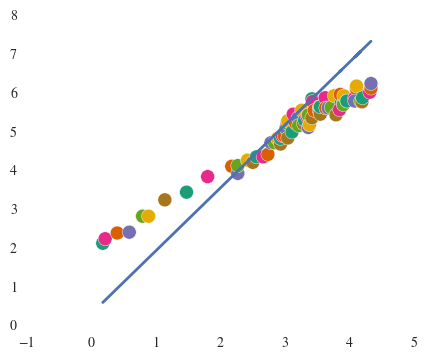

0 [ 1.62342274] [ 0.31601024]


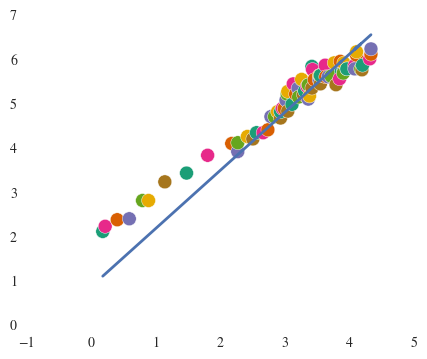

50 [ 1.31275773] [ 0.89042878]


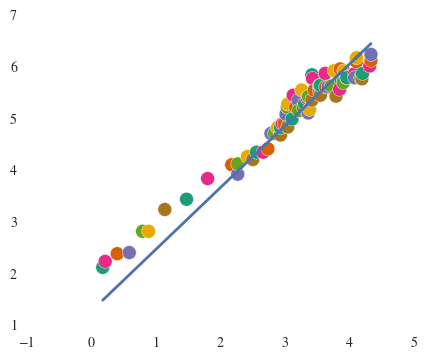

100 [ 1.19598055] [ 1.28573561]


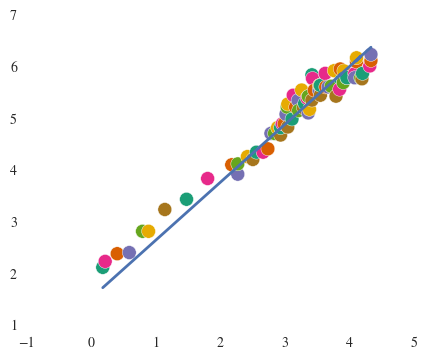

150 [ 1.12063968] [ 1.54077446]


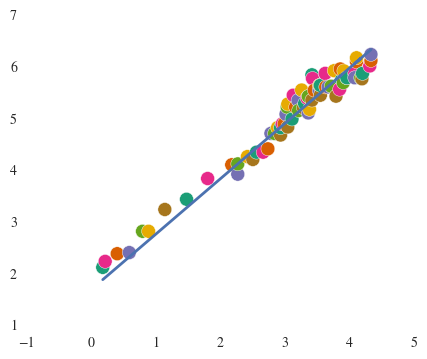

200 [ 1.07203245] [ 1.70531642]


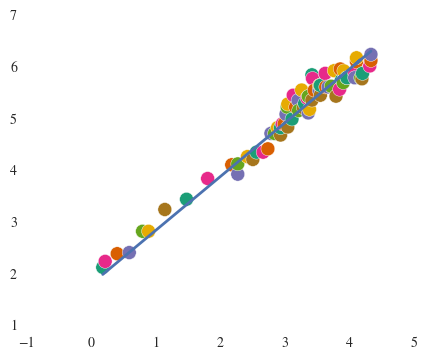

250 [ 1.04067278] [ 1.81147337]


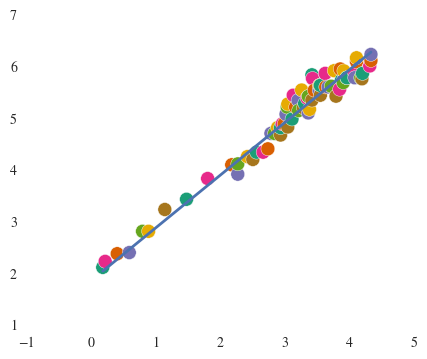

300 [ 1.02044046] [ 1.87996233]


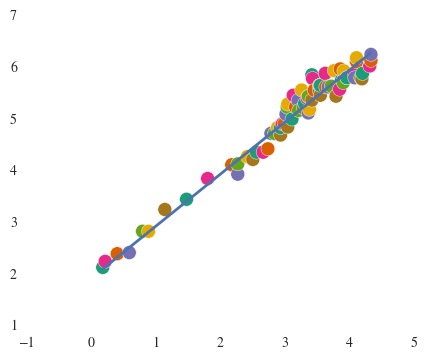

350 [ 1.00738728] [ 1.92414892]


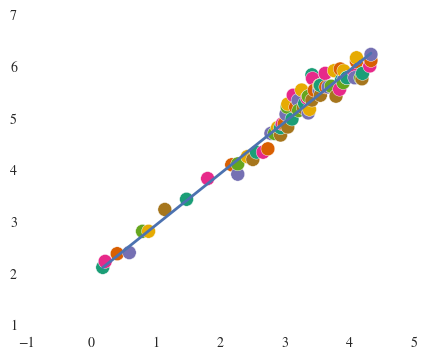

400 [ 0.99896592] [ 1.95265663]


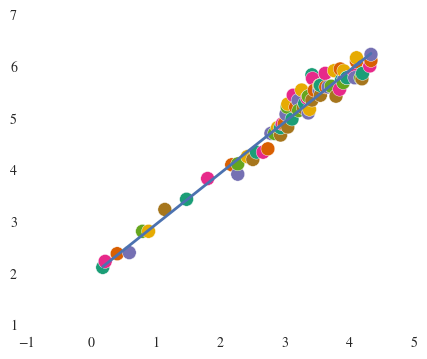

450 [ 0.9935326] [ 1.97104907]


In [12]:
for step in range(500):
    sess.run(train)
    if step % 50 == 0:
        plt.figure(figsize=(5,4))
        plt.scatter(X, y, s=100, c=dark2_colors)
        plt.plot(X, sess.run(W) * X + sess.run(b))
        plt.show()
        print (step, sess.run(W), sess.run(b))

That's how it works. We see that on each iteration, TensorFlow is adjusting the ```W``` and the ```b``` according to the Gradient Descent algorithm. We stop it arbitrarily after 500 iterations, but we could also define a stopping criterion. Next, for Neural Nets, we will be building on the same programming model - using variables, placeholders, models (or loss functions) and optimizers - at at each step, just making the definitions more elaborate.


*Note: Examples from the Udacity course on Deep Learning*
=======

The remainder of the notebook uses the examples gratuitously taken from the first four assignments from the recent Udacity course on [Deep Learning](https://www.udacity.com/course/deep-learning--ud730). They cover the principal methods to get "up and running" with TensorFlow, in particular for the analysis of images. Assignments 5 and 6 of the course investigate text analysis and are not included here. The Udacity course has lectures by Google Brain lead Vincent Vanhoucke, which give a concise overview of the concepts.   


---

---   
- Step 1 -     
=================

Loading, visualizing the pickled data
---------------

---


As in the Udacity course, we will be using the [notMNIST](http://yaroslavvb.blogspot.com/2011/09/notmnist-dataset.html) dataset of letters A -- J for the examples - while it resembles the well-known [MNIST](http://yann.lecun.com/exdb/mnist/) digit dataset, it adds a little more variety to the images: different fonts, some noise, missing patches, etc. As a result, the ten labels are slightly more difficult to predit than MNIST.  

Each image is a gray-scale 28x28 pixel image of a single character rendered in a variety of fonts and labelled in one of 10 classes 'A' through 'J' (10 classes).   

The dataset that is in the pickle file that you have downloaded is a subset of the full notMNIST set - but rather a random sample of 20000 training images, 10000 validation images and 10000 test images. Once it has been have downloaded, unzipped and placed in the same folder as this notebook, we can open the pickle file. Those who want to pursue further with this dataset (and faster computers or GPUs) can download the full 500K images and create larger datasets - the intro assignment of the Udacity course can show you how. 

In [259]:
pickle_file = 'notMNIST.pickle'

with open(pickle_file, 'rb') as f:
    save = pickle.load(f)
    train_dataset = save['train_dataset']
    train_labels = save['train_labels']
    valid_dataset = save['valid_dataset']
    valid_labels = save['valid_labels']
    test_dataset = save['test_dataset']
    test_labels = save['test_labels']
    del save  # hint to help gc free up memory - get rid of the pickle load
    print('Training set', train_dataset.shape, train_labels.shape)
    print('Validation set', valid_dataset.shape, valid_labels.shape)
    print('Test set', test_dataset.shape, test_labels.shape)

Training set (200000, 28, 28) (200000,)
Validation set (10000, 28, 28) (10000,)
Test set (10000, 28, 28) (10000,)


We now have each of ```_dataset``` and ```_labels``` for all three datasets. 

---
Visualizing the data
---------

We can use matplotlib image to visualize the images. First we check the first two rows of the training dataset and labels. The datasets consist of a 3D array (image index, x, y) of floating point values. Each image has already been normalized to have approximately zero mean and standard deviation of approximately 0.5 . 

Once we print out the first two rows, we randomly select 5 images from each dataset - which will be an image of a character A through J rendered in various fonts. As we may see, some of the images are a quite liberal interpetation of the character.

---

[[[ 0.5         0.5         0.5        ..., -0.5        -0.5        -0.5       ]
  [ 0.5         0.5         0.5        ..., -0.49607843 -0.5        -0.5       ]
  [ 0.5         0.5         0.5        ..., -0.49607843 -0.49607843 -0.5       ]
  ..., 
  [ 0.5         0.5         0.5        ..., -0.5        -0.49607843 -0.5       ]
  [ 0.5         0.5         0.5        ..., -0.49215686 -0.5        -0.5       ]
  [ 0.5         0.5         0.5        ..., -0.5        -0.5        -0.5       ]]

 [[-0.5        -0.01764706  0.5        ...,  0.5         0.48823529
    0.48039216]
  [-0.5        -0.45294118 -0.31568629 ...,  0.5         0.05686275
   -0.44901961]
  [-0.49607843 -0.5        -0.44509804 ...,  0.5        -0.00588235 -0.5       ]
  ..., 
  [-0.49607843 -0.5        -0.44509804 ...,  0.5        -0.00588235 -0.5       ]
  [-0.5        -0.45294118 -0.31568629 ...,  0.5         0.05686275
   -0.44901961]
  [-0.5        -0.01764706  0.5        ...,  0.5         0.48823529
    0.48039216

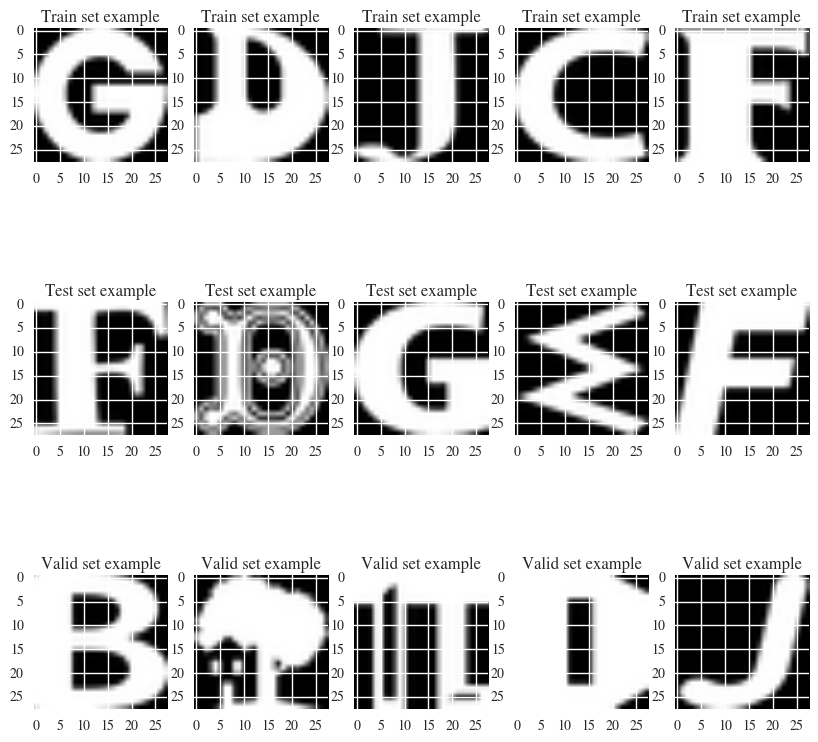

In [260]:
import matplotlib.image as mpimg
plt.ion()
fig1 = plt.figure(figsize=(10, 10))
plt.gray()

print (train_dataset[:2,:,:])
print (train_labels[:2])

for k in range(5):
    i = np.random.choice(range(len(train_dataset)))
    img = train_dataset[i, :, :]
    imgplot1 = fig1.add_subplot(3,5,k+1)
    imgplot1.imshow(img)    
    imgplot1.set_title("Train set example")

for k in range(5):
    i = np.random.choice(range(len(test_dataset)))
    img = test_dataset[i, :, :]
    imgplot2 = fig1.add_subplot(3,5,k+6)
    imgplot2.imshow(img)    
    imgplot2.set_title("Test set example")

for k in range(5):
    i = np.random.choice(range(len(valid_dataset)))
    img = valid_dataset[i, :, :]
    imgplot3 = fig1.add_subplot(3,5,k+11)
    imgplot3.imshow(img)    
    imgplot3.set_title("Valid set example") 
    
plt.show()

---
Logistic Regression with SciKit-Learn
---------

After HW2, you now have a good knowledge of the SciKit Learn package classifiers. Before looking at Deep Learning, how would an 'off-the-shelf' SciKit Learn classifier like logistic regression perform? We will now train a simple model using 50, 100, 1000, 5000 and 10000 training samples and the logistic regression classifier and check the accuracy.  We use reshape to make each 28 by 28 image grid into a 784 array. 

---

In [30]:
kays = [50, 100, 1000, 5000, 10000]
for k in kays:
    X_train = train_dataset[:k,:,:].reshape(k,784)
    y_train = train_labels[:k]
    X_valid = valid_dataset[:k,:,:].reshape(k,784)
    y_valid = valid_labels[:k]

    logistic = LogisticRegression()
    print('LogisticRegression score: %f'
          % logistic.fit(X_train, y_train).score(X_valid, y_valid))
    
clf = logistic.fit(X_train, y_train)
print(clf.coef_.shape)

LogisticRegression score: 0.600000
LogisticRegression score: 0.780000
LogisticRegression score: 0.786000
LogisticRegression score: 0.771800
LogisticRegression score: 0.785700
(10, 784)


We get the accuracy score on the validation set up to 78.5% for 10000 training samples. Now let's see what a logistic regression model in TensorFlow can do.

---
- Step 2 - 
===========   
Simple models in TensorFlow
-------------

We will work on developing progressively more accurate models with TensorFlow. The objective to to discover how to construct deeper models introduce regularization so that we do not overfit on the training data. Overfitting will show-up as high training accuracy but where the model does not perform well on the validation and test data. 

---

The first step is to reformat the images - as we did for the SciKitLearn example above - into a flat array that's more adapted to the simple multilayer models that we will use as examples, and to transform the labels into one-hot-encoded matrices with 10 columns. We reformat the data structures in-place (please remember this when running the notebook later - to get the original image matrices - reload the pickle file.)

In [261]:
image_size = 28
num_labels = 10

def reformat(dataset, labels):
    dataset = dataset.reshape((-1, image_size * image_size)).astype(np.float32)
    # Map 0 to [1.0, 0.0, 0.0 ...], 1 to [0.0, 1.0, 0.0 ...]
    labels = (np.arange(num_labels) == labels[:,None]).astype(np.float32)
    return dataset, labels
train_dataset, train_labels = reformat(train_dataset, train_labels)
valid_dataset, valid_labels = reformat(valid_dataset, valid_labels)
test_dataset, test_labels = reformat(test_dataset, test_labels)
print('Training set', train_dataset.shape, train_labels.shape)
print('Validation set', valid_dataset.shape, valid_labels.shape)
print('Test set', test_dataset.shape, test_labels.shape)

Training set (200000, 784) (200000, 10)
Validation set (10000, 784) (10000, 10)
Test set (10000, 784) (10000, 10)


---
Multinomial logistic regression using simple gradient descent
---------

As above, we start by describing the elements of the model to optimize using gradient descent. However, now we will define a graph which describes the computations. Once defined, this graph can visualized using Tensorboard in a browser. The edges will be the tensors and the nodes will be the input, operations and outputs.  

- We define the graph with ```graph = tf.Graph()``` and create the computation process within a block under  

      with graph.as_default():

The data are attached to the graph using ```tf.constant()```. We do this for both the labels and images for the training set and also for the images in the both the valid and test data.

We construct the weights ```W``` and biases ```b```, specify their size and define how they should be initialized.    

    weights = tf.Variable(tf.truncated_normal([784, 10]))
    biases = tf.Variable(tf.zeros([10]))

We create an expression for ```logits``` which defines the linear part of the logistics regression.  

    logits = tf.matmul(tf_train_dataset, weights) + biases  
    
and define the loss function using the TensorFlow function ```tf.nn.softmax_cross_entropy_with_logits()```. The function combines both the softmax tranformation and the entropy calculation from the logit model.  

We can run the operations on this graph as many times as wanted by calling ```session.run()```, providing it outputs to fetch from the graph that get returned. This runtime operation is all contained in the block below:

      with tf.Session(graph=graph) as session:


To save some time, we will only load half the data into TensorFlow and build the computation graph corresponding to our training. 

---

In [262]:
# With gradient descent training, even this much data is prohibitive.
# Subset the training data for faster turnaround.
train_subset = 10000

graph = tf.Graph()
with graph.as_default():

    # Input data.
    # Load the training, validation and test data into constants that are
    # attached to the graph.
    tf_train_dataset = tf.constant(train_dataset[:train_subset, :])
    tf_train_labels = tf.constant(train_labels[:train_subset])
    tf_valid_dataset = tf.constant(valid_dataset)
    tf_test_dataset = tf.constant(test_dataset)

    # Variables.
    # These are the parameters that we are going to be training. The weight
    # matrix will be initialized using random values following a (truncated)
    # normal distribution. The biases get initialized to zero.
    weights = tf.Variable(tf.truncated_normal([784, 10]))
    biases = tf.Variable(tf.zeros([10]))
  
    # Training computation.
    # We multiply the inputs with the weight matrix, and add biases. We compute
    # the softmax and cross-entropy (it's one operation in TensorFlow, because
    # it's very common, and it can be optimized). We take the average of this
    # cross-entropy across all training examples: that's our loss.
    logits = tf.matmul(tf_train_dataset, weights) + biases
    loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits, tf_train_labels))
  
    # Optimizer.
    # We are going to find the minimum of this loss using gradient descent.
    optimizer = tf.train.GradientDescentOptimizer(0.5).minimize(loss)

    # Predictions for the training, validation, and test data.
    # These are not part of training, but merely here so that we can report
    # accuracy figures as we train.
    train_prediction = tf.nn.softmax(logits)
    valid_prediction = tf.nn.softmax(tf.matmul(tf_valid_dataset, weights) + biases)
    test_prediction = tf.nn.softmax(tf.matmul(tf_test_dataset, weights) + biases)

Let's run this computation and iterate. We need to define a function to calculate the accuracy. This will take the class with the highest probility Note the changes from befor:
- we run ``` tf.initialize_all_variables()``` directly without using ```init```.
- we collect the optimizer, loss and predictions and save them
- we print out the results every 100 epochs
- we write to the TensorBoard graph to show the computation visually.     

For writing to Tensorboard, we added the lines:  

    merged = tf.merge_all_summaries() 
    writer = tf.train.SummaryWriter("/tmp/tensorflowlogs", session.graph)

In [263]:
num_steps = 801

def accuracy(predictions, labels):
    return (100.0 * np.sum(np.argmax(predictions, 1) == np.argmax(labels, 1))
            / predictions.shape[0])

with tf.Session(graph=graph) as session:
    # This is a one-time operation which ensures the parameters get initialized as
    # we described in the graph: random weights for the matrix, zeros for the
    # biases. 
    tf.initialize_all_variables().run()
    merged = tf.merge_all_summaries()
    writer = tf.train.SummaryWriter("/tmp/tensorflowlogs", session.graph)
    print('Initialized')
    for step in range(num_steps):
        # Run the computations. We tell .run() that we want to run the optimizer,
        # and get the loss value and the training predictions returned as numpy
        # arrays.
        _, l, predictions = session.run([optimizer, loss, train_prediction])
        if (step % 100 == 0):
            print('Loss at step %d: %f' % (step, l))
            print('Training accuracy: %.1f%%' % accuracy(predictions, train_labels[:train_subset, :]))
            # Calling .eval() on valid_prediction is basically like calling run(), but
            # just to get that one numpy array. Note that it recomputes all its graph
            # dependencies.
            print('Validation accuracy: %.1f%%' % accuracy(valid_prediction.eval(), valid_labels))
    print('Test accuracy: %.1f%%' % accuracy(test_prediction.eval(), test_labels))

Initialized
Loss at step 0: 18.498194
Training accuracy: 8.9%
Validation accuracy: 11.4%
Loss at step 100: 2.425138
Training accuracy: 71.1%
Validation accuracy: 70.2%
Loss at step 200: 1.926166
Training accuracy: 74.7%
Validation accuracy: 72.9%
Loss at step 300: 1.668954
Training accuracy: 75.8%
Validation accuracy: 73.6%
Loss at step 400: 1.499486
Training accuracy: 76.7%
Validation accuracy: 73.9%
Loss at step 500: 1.373745
Training accuracy: 77.4%
Validation accuracy: 74.3%
Loss at step 600: 1.274439
Training accuracy: 78.0%
Validation accuracy: 74.4%
Loss at step 700: 1.193020
Training accuracy: 78.5%
Validation accuracy: 74.5%
Loss at step 800: 1.124510
Training accuracy: 78.8%
Validation accuracy: 74.7%
Test accuracy: 82.2%


---   
Logistic regression with stochastic gradient descent
----------------    

Let's now switch to stochastic gradient descent training instead, which is much faster.

The graph will be similar, except that instead of holding all the training data into a constant node, we create a `placeholder` node which will be fed actual data at every call of `session.run()`.    

---

In [44]:
batch_size = 256

graph = tf.Graph()
with graph.as_default():

    # Input data. For the training data, we use a placeholder that will be fed
    # at run time with a training minibatch.
    tf_train_dataset = tf.placeholder(tf.float32, shape=(batch_size, 784))
    tf_train_labels = tf.placeholder(tf.float32, shape=(batch_size, 10))
    tf_valid_dataset = tf.constant(valid_dataset)
    tf_test_dataset = tf.constant(test_dataset)

    # Variables.
    weights = tf.Variable(tf.truncated_normal([784, 10]))
    biases = tf.Variable(tf.zeros([10]))

    # Training computation.
    logits = tf.matmul(tf_train_dataset, weights) + biases
    loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits, tf_train_labels))

    # Optimizer.
    optimizer = tf.train.GradientDescentOptimizer(0.5).minimize(loss)

    # Predictions for the training, validation, and test data.
    train_prediction = tf.nn.softmax(logits)
    valid_prediction = tf.nn.softmax(tf.matmul(tf_valid_dataset, weights) + biases)
    test_prediction = tf.nn.softmax(tf.matmul(tf_test_dataset, weights) + biases)

Let's run it:

In [45]:
num_steps = 3001

with tf.Session(graph=graph) as session:
    tf.initialize_all_variables().run()
    print("Initialized")
    for step in range(num_steps):
        # Pick an offset within the training data, which has been randomized.
        # Note: we could use better randomization across epochs.
        offset = (step * batch_size) % (train_labels.shape[0] - batch_size)
        # Generate a minibatch.
        batch_data = train_dataset[offset:(offset + batch_size), :]
        batch_labels = train_labels[offset:(offset + batch_size), :]
        # Prepare a dictionary telling the session where to feed the minibatch.
        # The key of the dictionary is the placeholder node of the graph to be fed,
        # and the value is the numpy array to feed to it.
        feed_dict = {tf_train_dataset : batch_data, tf_train_labels : batch_labels}
        _, l, predictions = session.run([optimizer, loss, train_prediction], feed_dict=feed_dict)
        if (step % 500 == 0):
            print("Minibatch loss at step %d: %f" % (step, l))
            print("Minibatch accuracy: %.1f%%" % accuracy(predictions, batch_labels))
            print("Validation accuracy: %.1f%%" % accuracy(valid_prediction.eval(), valid_labels))
    print("Test accuracy: %.1f%%" % accuracy(test_prediction.eval(), test_labels))

Initialized
Minibatch loss at step 0: 16.610388
Minibatch accuracy: 7.4%
Validation accuracy: 11.8%
Minibatch loss at step 500: 1.496551
Minibatch accuracy: 78.5%
Validation accuracy: 75.3%
Minibatch loss at step 1000: 1.364612
Minibatch accuracy: 73.8%
Validation accuracy: 76.3%
Minibatch loss at step 1500: 1.114137
Minibatch accuracy: 80.5%
Validation accuracy: 77.0%
Minibatch loss at step 2000: 0.857561
Minibatch accuracy: 81.2%
Validation accuracy: 77.9%
Minibatch loss at step 2500: 1.132722
Minibatch accuracy: 76.6%
Validation accuracy: 78.2%
Minibatch loss at step 3000: 0.844099
Minibatch accuracy: 79.7%
Validation accuracy: 78.9%
Test accuracy: 86.2%


---
1-hidden layer neural network with reLus
-------

We turn the logistic regression example with SGD into a 1-hidden layer neural network with rectified linear units [nn.relu()](https://www.tensorflow.org/versions/r0.7/api_docs/python/nn.html#relu) and 1024 hidden nodes. This model  improves both the validation and test accuracy.

---

In [46]:
batch_size = 256
hidden_nodes = 1024

graph = tf.Graph()
with graph.as_default():

    # Input data.
    tf_train_dataset = tf.placeholder(tf.float32, shape=(batch_size, 784))
    tf_train_labels = tf.placeholder(tf.float32, shape=(batch_size, 10))
    tf_valid_dataset = tf.constant(valid_dataset)
    tf_test_dataset = tf.constant(test_dataset)

    # Variables.
    layer1_weights = tf.Variable(tf.truncated_normal([784, hidden_nodes]))
    layer1_biases = tf.Variable(tf.zeros([hidden_nodes]))
    layer2_weights = tf.Variable(tf.truncated_normal([hidden_nodes, 10]))
    layer2_biases = tf.Variable(tf.zeros([10]))

    # Model.
    def model(data):
        layer1 = tf.matmul(data, layer1_weights) + layer1_biases
        hidden1 = tf.nn.relu(layer1)
        return tf.matmul(hidden1, layer2_weights) + layer2_biases
    
    # Training computation.
    logits = model(tf_train_dataset)
    loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits, tf_train_labels))

    # Optimizer.
    optimizer = tf.train.GradientDescentOptimizer(0.05).minimize(loss)

    # Predictions for the training, validation, and test data.
    train_prediction = tf.nn.softmax(logits)
    valid_prediction = tf.nn.softmax(model(tf_valid_dataset))
    test_prediction = tf.nn.softmax(model(tf_test_dataset))

In [47]:
def run_session(n_steps):
    with tf.Session(graph=graph) as session:
        tf.initialize_all_variables().run()
        print("Initialized")
        for step in range(n_steps):
            offset = (step * batch_size) % (train_labels.shape[0] - batch_size)
            batch_data = train_dataset[offset:(offset + batch_size), :]
            batch_labels = train_labels[offset:(offset + batch_size), :]
            feed_dict = {tf_train_dataset : batch_data, tf_train_labels : batch_labels}
            _, l, predictions = session.run([optimizer, loss, train_prediction], feed_dict=feed_dict)
            if (step % 500 == 0):
                print('Minibatch loss at step %d: %f' % (step, l))
                print('Minibatch accuracy: %.1f%%' % accuracy(predictions, batch_labels))
                print('Validation accuracy: %.1f%%' % accuracy(valid_prediction.eval(), valid_labels))
        print('Test accuracy: %.1f%%' % accuracy(test_prediction.eval(), test_labels))

run_session(3001)

Initialized
Minibatch loss at step 0: 372.034302
Minibatch accuracy: 10.2%
Validation accuracy: 20.5%
Minibatch loss at step 500: 21.838032
Minibatch accuracy: 79.7%
Validation accuracy: 79.5%
Minibatch loss at step 1000: 20.674927
Minibatch accuracy: 76.6%
Validation accuracy: 80.1%
Minibatch loss at step 1500: 15.964230
Minibatch accuracy: 81.2%
Validation accuracy: 82.0%
Minibatch loss at step 2000: 10.295261
Minibatch accuracy: 84.8%
Validation accuracy: 82.1%
Minibatch loss at step 2500: 10.054707
Minibatch accuracy: 84.8%
Validation accuracy: 82.5%
Minibatch loss at step 3000: 5.940981
Minibatch accuracy: 85.5%
Validation accuracy: 83.2%
Test accuracy: 89.6%


---   
- Step 3 - 
=============
Regularization
--------------

We have already trained a logistic regression and a neural network model.

Now we will explore regularization techniques.   

---   

---
Simple Neural Network with L2 regularization
---------

We introduce and tune L2 regularization for both logistic and neural network models. Remember that L2 amounts to adding a penalty on the norm of the weights to the loss. In TensorFlow, you can compute the L2 loss for a tensor `t` using `nn.l2_loss(t)`. The right amount of regularization should improve our validation and test accuracy.

---

In [345]:
batch_size = 256
hidden_nodes = 1024
lamb_reg = 0.01

graph = tf.Graph()
with graph.as_default():

    # Input data.
    tf_train_dataset = tf.placeholder(tf.float32, shape=(batch_size, 784))
    tf_train_labels = tf.placeholder(tf.float32, shape=(batch_size, 10))
    tf_valid_dataset = tf.constant(valid_dataset)
    tf_test_dataset = tf.constant(test_dataset)

    # Variables.
    layer1_weights = tf.Variable(tf.truncated_normal([784, hidden_nodes]))
    layer1_biases = tf.Variable(tf.zeros([hidden_nodes]))
    layer2_weights = tf.Variable(tf.truncated_normal([hidden_nodes, 10]))
    layer2_biases = tf.Variable(tf.zeros([10]))

    # Model.
    def model(data):
        layer1 = tf.matmul(data, layer1_weights) + layer1_biases
        hidden1 = tf.nn.relu(layer1)
        return tf.matmul(hidden1, layer2_weights) + layer2_biases
    
    # Training computation.
    logits = model(tf_train_dataset)
    loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits, tf_train_labels))
    regularizers = (tf.nn.l2_loss(layer1_weights) + tf.nn.l2_loss(layer1_biases) + 
                    tf.nn.l2_loss(layer2_weights) + tf.nn.l2_loss(layer2_biases))
    # Add the regularization term to the loss.
    loss += lamb_reg * regularizers

    # Optimizer.
    optimizer = tf.train.GradientDescentOptimizer(0.05).minimize(loss)

    # Predictions for the training, validation, and test data.
    train_prediction = tf.nn.softmax(logits)
    valid_prediction = tf.nn.softmax(model(tf_valid_dataset))
    test_prediction = tf.nn.softmax(model(tf_test_dataset))
    
# Run the session
run_session(3001)

Initialized
Minibatch loss at step 0: 3477.407227
Minibatch accuracy: 7.8%
Validation accuracy: 19.5%
Minibatch loss at step 500: 1905.214844
Minibatch accuracy: 81.2%
Validation accuracy: 78.7%
Minibatch loss at step 1000: 1153.698120
Minibatch accuracy: 80.9%
Validation accuracy: 80.4%
Minibatch loss at step 1500: 697.008179
Minibatch accuracy: 83.2%
Validation accuracy: 81.7%
Minibatch loss at step 2000: 421.919800
Minibatch accuracy: 83.6%
Validation accuracy: 82.2%
Minibatch loss at step 2500: 255.439590
Minibatch accuracy: 82.8%
Validation accuracy: 83.2%
Minibatch loss at step 3000: 154.822968
Minibatch accuracy: 87.5%
Validation accuracy: 84.5%
Test accuracy: 90.8%


---
Example - extreme overfitting
---------
Let's demonstrate an extreme case of overfitting. We restrict the training data to just a few batches. What happens?

---

In [346]:
# Run a session with just 5 batches
run_session(5)

Initialized
Minibatch loss at step 0: 3486.231201
Minibatch accuracy: 8.2%
Validation accuracy: 19.3%
Test accuracy: 56.4%


---
Regularization using dropout
---------
We introduce Dropout on the hidden layer of the neural network. Remember: Dropout should only be introduced during training, not evaluation, otherwise your evaluation results would be stochastic as well. TensorFlow provides `nn.dropout()` for that, but you have to make sure it's only inserted during training.

---

In [54]:
batch_size = 256
hidden_nodes = 1024
lamb_reg = 0.01

graph = tf.Graph()
with graph.as_default():

    # Input data.
    tf_train_dataset = tf.placeholder(tf.float32, shape=(batch_size, 784))
    tf_train_labels = tf.placeholder(tf.float32, shape=(batch_size, 10))
    tf_valid_dataset = tf.constant(valid_dataset)
    tf_test_dataset = tf.constant(test_dataset)

    # Variables.
    layer1_weights = tf.Variable(tf.truncated_normal([784, hidden_nodes]))
    layer1_biases = tf.Variable(tf.zeros([hidden_nodes]))
    layer2_weights = tf.Variable(tf.truncated_normal([hidden_nodes, 10]))
    layer2_biases = tf.Variable(tf.zeros([10]))
        
    keep_prob = tf.placeholder("float")
    
    # Model with dropout
    def model(data, train=False):
        layer1 = tf.matmul(data, layer1_weights) + layer1_biases
        hidden1 = tf.nn.relu(layer1)
        # dropout on the hidden layer
        if train:
            hidden1 = tf.nn.dropout(hidden1, keep_prob)
        return tf.matmul(hidden1, layer2_weights) + layer2_biases
    
    # Training computation.
    logits = model(tf_train_dataset, True)
    loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits, tf_train_labels))
    regularizers = (tf.nn.l2_loss(layer1_weights) + tf.nn.l2_loss(layer1_biases) + 
                    tf.nn.l2_loss(layer2_weights) + tf.nn.l2_loss(layer2_biases))
    # Add the regularization term to the loss.
    loss += lamb_reg * regularizers

    # Optimizer.
    optimizer = tf.train.GradientDescentOptimizer(0.05).minimize(loss)

    # Predictions for the training, validation, and test data.
    train_prediction = tf.nn.softmax(logits)
    valid_prediction = tf.nn.softmax(model(tf_valid_dataset))
    test_prediction = tf.nn.softmax(model(tf_test_dataset))


In [55]:
# Re-define the function to include the keep probability
def run_session(n_steps, k_prob):

    with tf.Session(graph=graph) as session:
        tf.initialize_all_variables().run()
        print("Initialized")
        for step in range(n_steps):
            offset = (step * batch_size) % (train_labels.shape[0] - batch_size)
            batch_data = train_dataset[offset:(offset + batch_size), :]
            batch_labels = train_labels[offset:(offset + batch_size), :]
            feed_dict = {tf_train_dataset : batch_data, tf_train_labels : batch_labels, keep_prob : k_prob}
            _, l, predictions = session.run([optimizer, loss, train_prediction], feed_dict=feed_dict)
            if (step % 500 == 0):
                print("Minibatch loss at step {}: {}".format(step, l))
                print("Minibatch accuracy: {:.1f}".format(accuracy(predictions, batch_labels)))
                print("Validation accuracy: {:.1f}".format(accuracy(valid_prediction.eval(), valid_labels)))
        print("Test accuracy: {:.1f}".format(accuracy(test_prediction.eval(), test_labels)))
        
run_session(3001, 0.5)

Initialized
Minibatch loss at step 0: 3587.203125
Minibatch accuracy: 11.7
Validation accuracy: 20.8
Minibatch loss at step 500: 1907.32177734375
Minibatch accuracy: 78.1
Validation accuracy: 82.5
Minibatch loss at step 1000: 1147.8837890625
Minibatch accuracy: 75.0
Validation accuracy: 83.9
Minibatch loss at step 1500: 691.355224609375
Minibatch accuracy: 78.9
Validation accuracy: 84.2
Minibatch loss at step 2000: 417.85040283203125
Minibatch accuracy: 79.7
Validation accuracy: 84.2
Minibatch loss at step 2500: 253.0830078125
Minibatch accuracy: 79.7
Validation accuracy: 84.4
Minibatch loss at step 3000: 153.4779052734375
Minibatch accuracy: 84.4
Validation accuracy: 84.8
Test accuracy: 90.9


## What happens to our extreme overfitting case?

In [56]:
# Run a session with just 5 batches
run_session(5, 0.5)

Initialized
Minibatch loss at step 0: 3650.361572265625
Minibatch accuracy: 7.0
Validation accuracy: 18.3
Test accuracy: 60.2


---
- Step 4 -
============
Best performing multi-layer model
---------

We try to improve the performance using a multi-layer model! The best reported test accuracy using a deep network is [97.1%](http://yaroslavvb.blogspot.com/2011/09/notmnist-dataset.html?showComment=1391023266211#c8758720086795711595).

To deepen the model, the most obvious solution is to add multiple layers.

Another one is to use learning rate decay:

    global_step = tf.Variable(0)  # count the number of steps taken.
    learning_rate = tf.train.exponential_decay(0.5, global_step, ...)
    optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss, global_step=global_step)
 
 ---

In [109]:
def weight_variable(shape):
    #initial = tf.truncated_normal(shape, stddev=0.01)
    initial = tf.truncated_normal(shape, stddev=tf.sqrt(2.0/shape[0]))
    return tf.Variable(initial)

def bias_variable(shape):
    #initial = tf.constant(0.1, shape=shape)
    initial = tf.zeros(shape)
    return tf.Variable(initial)

split_by_half = lambda x,k : int(x/2**k)

In [116]:
batch_size = 256
hidden_nodes = 1024
lamb_reg = 0.001

graph = tf.Graph()
with graph.as_default():

    # Input data.
    tf_train_dataset = tf.placeholder(tf.float32, shape=(batch_size, 784))
    tf_train_labels = tf.placeholder(tf.float32, shape=(batch_size, 10))
    tf_valid_dataset = tf.constant(valid_dataset)
    tf_test_dataset = tf.constant(test_dataset)

    # Variables.
    layer1_weights = weight_variable([784, hidden_nodes])
    layer1_biases = bias_variable([hidden_nodes])
    layer2_weights = weight_variable([hidden_nodes, split_by_half(hidden_nodes,0)])
    layer2_biases = bias_variable([split_by_half(hidden_nodes,0)])
    layer3_weights = weight_variable([split_by_half(hidden_nodes,0), split_by_half(hidden_nodes,0)])
    layer3_biases = bias_variable([split_by_half(hidden_nodes,0)])    
    layer4_weights = weight_variable([split_by_half(hidden_nodes,0), split_by_half(hidden_nodes,0)])
    layer4_biases = bias_variable([split_by_half(hidden_nodes,0)])    
    layer5_weights = weight_variable([split_by_half(hidden_nodes,0), split_by_half(hidden_nodes,0)])
    layer5_biases = bias_variable([split_by_half(hidden_nodes,0)]) 
    layer6_weights = weight_variable([split_by_half(hidden_nodes,0), 10])
    layer6_biases = bias_variable([10])
    
    keep_prob = tf.placeholder("float")
    
    # Model with dropout
    def model(data, proba=keep_prob):
        layer1 = tf.matmul(data, layer1_weights) + layer1_biases
        # dropout on the hidden layer
        hidden1 = tf.nn.dropout(tf.nn.relu(layer1), proba)
        # the new hidden layer
        layer2 = tf.matmul(hidden1, layer2_weights) + layer2_biases
        hidden2 = tf.nn.dropout(tf.nn.relu(layer2), proba)
        layer3 = tf.matmul(hidden2, layer3_weights) + layer3_biases
        hidden3 = tf.nn.dropout(tf.nn.relu(layer3), proba)
        layer4 = tf.matmul(hidden3, layer4_weights) + layer4_biases
        hidden4 = tf.nn.dropout(tf.nn.relu(layer4), proba)
        layer5 = tf.matmul(hidden4, layer5_weights) + layer5_biases        
        hidden5 = tf.nn.dropout(tf.nn.relu(layer5), proba)
        return tf.matmul(hidden5, layer6_weights) + layer6_biases
    
    # Training computation.
    logits = model(tf_train_dataset, keep_prob)
    loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits, tf_train_labels))
    regularizers = (tf.nn.l2_loss(layer1_weights) + tf.nn.l2_loss(layer1_biases) + \
                    tf.nn.l2_loss(layer2_weights) + tf.nn.l2_loss(layer2_biases) + \
                    tf.nn.l2_loss(layer3_weights) + tf.nn.l2_loss(layer3_biases) + \
                    tf.nn.l2_loss(layer4_weights) + tf.nn.l2_loss(layer4_biases) + \
                    tf.nn.l2_loss(layer5_weights) + tf.nn.l2_loss(layer5_biases) + \
                    tf.nn.l2_loss(layer6_weights) + tf.nn.l2_loss(layer6_biases))

    # Add the regularization term to the loss.
    #loss += lamb_reg * regularizers
    loss = tf.reduce_mean(loss + lamb_reg * regularizers)

    # Optimizer.
    # learning rate decay
    global_step = tf.Variable(0)  # count the number of steps taken.
    start_learning_rate = 0.5
    learning_rate = tf.train.exponential_decay(start_learning_rate, global_step, 100000, 0.96, staircase=True)
    optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss, global_step=global_step)

    # Predictions for the training, validation, and test data.
    train_prediction = tf.nn.softmax(logits)
    valid_prediction = tf.nn.softmax(model(tf_valid_dataset,1.0))
    test_prediction = tf.nn.softmax(model(tf_test_dataset,1.0))

In [117]:
n_steps = 3001
k_prob = 0.5

with tf.Session(graph=graph) as session:
    tf.initialize_all_variables().run()
    print("Initialized")
    for step in range(n_steps):
        offset = (step * batch_size) % (train_labels.shape[0] - batch_size)
        batch_data = train_dataset[offset:(offset + batch_size), :]
        batch_labels = train_labels[offset:(offset + batch_size), :]
        feed_dict = {tf_train_dataset : batch_data, tf_train_labels : batch_labels, keep_prob : k_prob}
        _, l, predictions = session.run([optimizer, loss, train_prediction], feed_dict=feed_dict)
        if (step % 500 == 0):
            print("Minibatch loss at step {}: {}".format(step, l))
            print("Minibatch accuracy: {:.1f}".format(accuracy(predictions, batch_labels)))
            print("Validation accuracy: {:.1f}".format(accuracy(valid_prediction.eval(), valid_labels)))
    print("Test accuracy: {:.1f}".format(accuracy(test_prediction.eval(), test_labels)))

Initialized
Minibatch loss at step 0: 7.409577369689941
Minibatch accuracy: 9.8
Validation accuracy: 10.0
Minibatch loss at step 500: 3.044938087463379
Minibatch accuracy: 82.4
Validation accuracy: 83.4
Minibatch loss at step 1000: 2.2381508350372314
Minibatch accuracy: 81.6
Validation accuracy: 85.1
Minibatch loss at step 1500: 1.503574252128601
Minibatch accuracy: 85.5
Validation accuracy: 86.8
Minibatch loss at step 2000: 1.1458631753921509
Minibatch accuracy: 86.3
Validation accuracy: 87.1
Minibatch loss at step 2500: 0.981412947177887
Minibatch accuracy: 82.8
Validation accuracy: 87.3
Minibatch loss at step 3000: 0.7737194299697876
Minibatch accuracy: 87.1
Validation accuracy: 87.7
Test accuracy: 92.9


In [119]:
pickle_file = 'notMNIST.pickle'

with open(pickle_file, 'rb') as f:
    save = pickle.load(f)
    train_dataset = save['train_dataset']
    train_labels = save['train_labels']
    valid_dataset = save['valid_dataset']
    valid_labels = save['valid_labels']
    test_dataset = save['test_dataset']
    test_labels = save['test_labels']
    del save  # hint to help gc free up memory
    print('Training set', train_dataset.shape, train_labels.shape)
    print('Validation set', valid_dataset.shape, valid_labels.shape)
    print('Test set', test_dataset.shape, test_labels.shape)

Training set (200000, 28, 28) (200000,)
Validation set (10000, 28, 28) (10000,)
Test set (10000, 28, 28) (10000,)


In [120]:
image_size = 28
num_labels = 10
num_channels = 1 # grayscale

import numpy as np

def reformat(dataset, labels):
    dataset = dataset.reshape((-1, image_size, image_size, num_channels)).astype(np.float32)
    labels = (np.arange(num_labels) == labels[:,None]).astype(np.float32)
    return dataset, labels
train_dataset, train_labels = reformat(train_dataset, train_labels)
valid_dataset, valid_labels = reformat(valid_dataset, valid_labels)
test_dataset, test_labels = reformat(test_dataset, test_labels)
print('Training set', train_dataset.shape, train_labels.shape)
print('Validation set', valid_dataset.shape, valid_labels.shape)
print('Test set', test_dataset.shape, test_labels.shape)

Training set (200000, 28, 28, 1) (200000, 10)
Validation set (10000, 28, 28, 1) (10000, 10)
Test set (10000, 28, 28, 1) (10000, 10)


---
- Step 5 -
============
Convolutional Neural Nets
---------

The goal now is make the neural network convolutional.   
Let's build a small network with two convolutional layers, followed by one fully connected layer. Convolutional networks are more expensive computationally, so we'll limit its depth and number of fully connected nodes.
 
 ---

## CNN from Tensorflow website tutorial


In [121]:
batch_size = 16
patch_size = 5
depth = 16
num_hidden = 64

graph = tf.Graph()

with graph.as_default():

    # Input data.
    tf_train_dataset = tf.placeholder(tf.float32, shape=(batch_size, image_size, image_size, num_channels))
    tf_train_labels = tf.placeholder(tf.float32, shape=(batch_size, num_labels))
    tf_valid_dataset = tf.constant(valid_dataset)
    tf_test_dataset = tf.constant(test_dataset)

    # Variables.
    layer1_weights = tf.Variable(tf.truncated_normal([patch_size, patch_size, num_channels, depth], stddev=0.1))
    layer1_biases = tf.Variable(tf.zeros([depth]))
    layer2_weights = tf.Variable(tf.truncated_normal([patch_size, patch_size, depth, depth], stddev=0.1))
    layer2_biases = tf.Variable(tf.constant(1.0, shape=[depth]))
    layer3_weights = tf.Variable(tf.truncated_normal([image_size // 4 * image_size // 4 * depth, num_hidden], stddev=0.1))
    layer3_biases = tf.Variable(tf.constant(1.0, shape=[num_hidden]))
    layer4_weights = tf.Variable(tf.truncated_normal([num_hidden, num_labels], stddev=0.1))
    layer4_biases = tf.Variable(tf.constant(1.0, shape=[num_labels]))
  
    # Model.
    def model(data):
        conv = tf.nn.conv2d(data, layer1_weights, [1, 2, 2, 1], padding='SAME')
        hidden = tf.nn.relu(conv + layer1_biases)
        conv = tf.nn.conv2d(hidden, layer2_weights, [1, 2, 2, 1], padding='SAME')
        hidden = tf.nn.relu(conv + layer2_biases)
        shape = hidden.get_shape().as_list()
        reshape = tf.reshape(hidden, [shape[0], shape[1] * shape[2] * shape[3]])
        hidden = tf.nn.relu(tf.matmul(reshape, layer3_weights) + layer3_biases)
        return tf.matmul(hidden, layer4_weights) + layer4_biases
  
    # Training computation.
    logits = model(tf_train_dataset)
    loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits, tf_train_labels))

    # Optimizer.
    optimizer = tf.train.GradientDescentOptimizer(0.05).minimize(loss)

    # Predictions for the training, validation, and test data.
    train_prediction = tf.nn.softmax(logits)
    valid_prediction = tf.nn.softmax(model(tf_valid_dataset))
    test_prediction = tf.nn.softmax(model(tf_test_dataset))

In [123]:
def run_session(n_steps):
    with tf.Session(graph=graph) as session:
        tf.initialize_all_variables().run()
        print('Initialized')
        for step in range(n_steps):
            offset = (step * batch_size) % (train_labels.shape[0] - batch_size)
            batch_data = train_dataset[offset:(offset + batch_size), :, :, :]
            batch_labels = train_labels[offset:(offset + batch_size), :]
            feed_dict = {tf_train_dataset : batch_data, tf_train_labels : batch_labels}
            _, l, predictions = session.run([optimizer, loss, train_prediction], feed_dict=feed_dict)
            if (step % 50 == 0):
                print('Minibatch loss at step %d: %f' % (step, l))
                print('Minibatch accuracy: %.1f%%' % accuracy(predictions, batch_labels))
                print('Validation accuracy: %.1f%%' % accuracy(valid_prediction.eval(), valid_labels))
        print('Test accuracy: %.1f%%' % accuracy(test_prediction.eval(), test_labels))
        
run_session(1001)

Initialized
Minibatch loss at step 0: 2.840119
Minibatch accuracy: 6.2%
Validation accuracy: 10.0%
Minibatch loss at step 50: 2.295006
Minibatch accuracy: 12.5%
Validation accuracy: 17.4%
Minibatch loss at step 100: 1.376617
Minibatch accuracy: 50.0%
Validation accuracy: 58.7%
Minibatch loss at step 150: 1.415563
Minibatch accuracy: 68.8%
Validation accuracy: 66.8%
Minibatch loss at step 200: 0.517044
Minibatch accuracy: 81.2%
Validation accuracy: 76.4%
Minibatch loss at step 250: 1.000265
Minibatch accuracy: 68.8%
Validation accuracy: 77.4%
Minibatch loss at step 300: 1.148949
Minibatch accuracy: 56.2%
Validation accuracy: 74.7%
Minibatch loss at step 350: 0.770374
Minibatch accuracy: 75.0%
Validation accuracy: 78.0%
Minibatch loss at step 400: 0.638169
Minibatch accuracy: 81.2%
Validation accuracy: 78.8%
Minibatch loss at step 450: 0.451470
Minibatch accuracy: 87.5%
Validation accuracy: 80.1%
Minibatch loss at step 500: 0.698294
Minibatch accuracy: 81.2%
Validation accuracy: 80.0%
Mi

In [124]:
image_size = 28
# Create image size function based on input, filter size, padding and stride
# 2 convolutions only with 2 pooling
def output_size_pool(input_size, conv_filter_size, pool_filter_size, padding, conv_stride, pool_stride):
    if padding == 'same':
        padding = -1.00
    elif padding == 'valid':
        padding = 0.00
    else:
        return None
    # After convolution 1
    output_1 = (((input_size - conv_filter_size - 2*padding) / conv_stride) + 1.00)
    # After pool 1
    output_2 = (((output_1 - pool_filter_size - 2*padding) / pool_stride) + 1.00)    
    # After convolution 2
    output_3 = (((output_2 - conv_filter_size - 2*padding) / conv_stride) + 1.00)
    # After pool 2
    output_4 = (((output_3 - pool_filter_size - 2*padding) / pool_stride) + 1.00)  
    return int(output_4)

final_image_size = output_size_pool(input_size=image_size, conv_filter_size=5, pool_filter_size=2, padding='valid', conv_stride=1, pool_stride=2)
print(final_image_size)

4


With pooling, dropout and learning rate decay  
------------------

In [125]:
batch_size = 16

depth = 32  # Output channels
num_channels = 1 # Input channels
num_hidden = 64
lamb_reg = 0.001

graph = tf.Graph()

with graph.as_default():

    # Input data.
    tf_train_dataset = tf.placeholder(tf.float32, shape=(batch_size, image_size, image_size, num_channels))
    tf_train_labels = tf.placeholder(tf.float32, shape=(batch_size, num_labels))
    tf_valid_dataset = tf.constant(valid_dataset)
    tf_test_dataset = tf.constant(test_dataset)

    # Variables.
    # Convolution
    layer1_weights = tf.Variable(tf.truncated_normal([patch_size, patch_size, num_channels, depth], stddev=0.1))
    layer1_biases = tf.Variable(tf.zeros([depth]))
    # Convolution
    layer2_weights = tf.Variable(tf.truncated_normal([patch_size, patch_size, depth, depth], stddev=0.1))
    layer2_biases = tf.Variable(tf.constant(1.0, shape=[depth]))
    # Fully Connected Layer
    final_image_size = output_size_pool(input_size=image_size, conv_filter_size=5, pool_filter_size=2, padding='valid', conv_stride=1, pool_stride=2)
    layer3_weights = tf.Variable(tf.truncated_normal([final_image_size * final_image_size * depth, num_hidden], stddev=0.1))
    layer3_biases = tf.Variable(tf.constant(1.0, shape=[num_hidden]))
    # Fully Connected Layer
    layer4_weights = tf.Variable(tf.truncated_normal([num_hidden, num_hidden], stddev=0.1))
    layer4_biases = tf.Variable(tf.constant(1.0, shape=[num_hidden]))
    # Softmax Layer
    layer5_weights = tf.Variable(tf.truncated_normal([num_hidden, num_labels], stddev=0.1))
    layer5_biases = tf.Variable(tf.constant(1.0, shape=[num_labels]))

    # Model.
    def model(data, k_prob):
        # Convolution
        conv = tf.nn.conv2d(data, layer1_weights, strides=[1, 1, 1, 1], padding='VALID')
        hidden = tf.nn.relu(conv + layer1_biases)
        pool = tf.nn.avg_pool(hidden, [1, 2, 2, 1], [1, 2, 2, 1], padding='VALID')
        # Convolution
        conv = tf.nn.conv2d(pool, layer2_weights, strides=[1, 1, 1, 1], padding='VALID')
        hidden = tf.nn.relu(conv + layer2_biases)
        pool = tf.nn.avg_pool(hidden, [1, 2, 2, 1], [1, 2, 2, 1], padding='VALID')
        # Fully Connected Layer
        shape = pool.get_shape().as_list()
        reshape = tf.reshape(pool, [shape[0], shape[1] * shape[2] * shape[3]])
        hidden = tf.nn.relu(tf.matmul(reshape, layer3_weights) + layer3_biases)
        hidden = tf.nn.dropout(hidden, k_prob)
        # Fully Connected Layer
        hidden = tf.nn.relu(tf.matmul(hidden, layer4_weights) + layer4_biases)
        hidden = tf.nn.dropout(hidden, k_prob)
        # Softmax Layer
        return tf.matmul(hidden, layer5_weights) + layer5_biases

    # Training computation.
    logits = model(tf_train_dataset, 0.5)
    loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits, tf_train_labels))
    regularizers = (tf.nn.l2_loss(layer1_weights) + tf.nn.l2_loss(layer1_biases) + \
                    tf.nn.l2_loss(layer2_weights) + tf.nn.l2_loss(layer2_biases) + \
                    tf.nn.l2_loss(layer3_weights) + tf.nn.l2_loss(layer3_biases) + \
                    tf.nn.l2_loss(layer4_weights) + tf.nn.l2_loss(layer4_biases) + \
                    tf.nn.l2_loss(layer5_weights) + tf.nn.l2_loss(layer5_biases))

    # Add the regularization term to the loss.
    #loss += lamb_reg * regularizers
    loss = tf.reduce_mean(loss + lamb_reg * regularizers)

    # Optimizer.
    # Decaying learning rate
    global_step = tf.Variable(0)  # count the number of steps taken.
    start_learning_rate = 0.05
    learning_rate = tf.train.exponential_decay(start_learning_rate, global_step, 100000, 0.96, staircase=True)

    optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

    # Predictions for the training, validation, and test data.
    train_prediction = tf.nn.softmax(logits)
    valid_prediction = tf.nn.softmax(model(tf_valid_dataset,1.0))
    test_prediction = tf.nn.softmax(model(tf_test_dataset,1.0))

In [126]:
run_session(3001)

Initialized
Minibatch loss at step 0: 4.680200
Minibatch accuracy: 6.2%
Validation accuracy: 10.0%
Minibatch loss at step 50: 2.581326
Minibatch accuracy: 31.2%
Validation accuracy: 30.2%
Minibatch loss at step 100: 2.238833
Minibatch accuracy: 31.2%
Validation accuracy: 40.0%
Minibatch loss at step 150: 2.288424
Minibatch accuracy: 25.0%
Validation accuracy: 52.1%
Minibatch loss at step 200: 1.921798
Minibatch accuracy: 43.8%
Validation accuracy: 56.2%
Minibatch loss at step 250: 1.660140
Minibatch accuracy: 56.2%
Validation accuracy: 66.0%
Minibatch loss at step 300: 2.269862
Minibatch accuracy: 31.2%
Validation accuracy: 62.0%
Minibatch loss at step 350: 1.681708
Minibatch accuracy: 50.0%
Validation accuracy: 69.5%
Minibatch loss at step 400: 1.673034
Minibatch accuracy: 56.2%
Validation accuracy: 66.6%
Minibatch loss at step 450: 1.387433
Minibatch accuracy: 62.5%
Validation accuracy: 75.4%
Minibatch loss at step 500: 1.532947
Minibatch accuracy: 62.5%
Validation accuracy: 75.9%
Mi